# Solution


# Metrique d'évaluation
Le problème est un problème de régression. je vais donc choisir la RMSE qui permet de pénaliser davantage les grosses erreurs.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
!head data/valeursfoncieres-2021.txt

Code service sages|Reference document|1 Articles CGI|2 Articles CGI|3 Articles CGI|4 Articles CGI|5 Articles CGI|No disposition|Date mutation|Nature mutation|Valeur fonciere|No voie|B/T/Q|Type de voie|Code voie|Voie|Code postal|Commune|Code departement|Code commune|Prefixe de section|Section|No plan|No Volume|1er lot|Surface Carrez du 1er lot|2eme lot|Surface Carrez du 2eme lot|3eme lot|Surface Carrez du 3eme lot|4eme lot|Surface Carrez du 4eme lot|5eme lot|Surface Carrez du 5eme lot|Nombre de lots|Code type local|Type local|Identifiant local|Surface reelle bati|Nombre pieces principales|Nature culture|Nature culture speciale|Surface terrain
|||||||000001|05/01/2021|Vente|185000,00|5080||CHE|0471|DE VOGELAS|1370|VAL-REVERMONT|01|426|312|ZC|122||||||||||||0|1|Maison||97|5|S||2410
|||||||000001|05/01/2021|Vente|185000,00|5080||CHE|0471|DE VOGELAS|1370|VAL-REVERMONT|01|426|312|ZC|122||||||||||||0|3|Dépendance||0|0|S||2410
|||||||000001|06/01/2021|Vente|10,00||||B043|ROUGEMONT|1290|BEY|01|

In [3]:
df_raw = pd.read_csv("./data/valeursfoncieres-2021.txt", sep="|")
df_raw

/var/folders/w8/yc1qhknn703dylm_6m340jhm0000gn/T/ipykernel_70390/203430908.py:1: DtypeWarning: Columns (18,23,24,26,28,30,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("./data/valeursfoncieres-2021.txt", sep="|")


,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,97.0,5.0,S,NaN,2410.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,2410.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,530.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,88.0,4.0,S,NaN,866.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,1426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12/03/2021,Vente,...,NaN,2,2.0,Appartement,NaN,30.0,2.0,NaN,NaN,NaN
4375219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17/03/2021,Vente,...,NaN,2,2.0,Appartement,NaN,37.0,2.0,NaN,NaN,NaN
4375220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/03/2021,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
4375221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/03/2021,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN


In [4]:
df_raw.columns

Index(['Code service sages', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

* 43 colonnes et 4,375,223 lignes
* D'après la documentation, la colonne target est : "Valeur fonciere"

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375223 entries, 0 to 4375222
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Code service sages          float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             object 
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune         

* La valeur fonciere est de type "object". Il faudra la convertir en nombre.
* Il y a par défaut 16 colonnes de type float, 4 de int, et 23 object (string).

In [6]:
df_raw.describe()

,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,No voie,Code postal,Code commune,Prefixe de section,No plan,5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Surface terrain
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.375223e+06,2.813838e+06,4.341508e+06,4.375223e+06,194708.000000,4.375223e+06,10118.000000,4.375223e+06,2.601426e+06,0.0,2.598901e+06,2.598901e+06,2.998470e+06
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.325654e+00,7.188059e+02,4.991590e+04,2.092508e+02,437.637827,4.153374e+02,96.812512,4.310839e-01,2.209693e+00,NaN,6.888919e+01,1.904886e+00,2.601758e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.933802e+00,2.011571e+03,2.728332e+04,1.677548e+02,314.707578,5.901918e+02,1307.522900,8.331728e-01,9.351654e-01,NaN,5.978159e+02,2.125924e+00,1.068309e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+03,1.000000e+00,1.000000,1.000000e+00,2.000000,0.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,8.000000e+00,2.830000e+04,7.500000e+01,165.000000,8.600000e+01,7.000000,0.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,2.460000e+02
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.500000e+01,4.737000e+04,1.720000e+02,323.000000,2.230000e+02,19.000000,0.000000e+00,2.000000e+00,NaN,3.900000e+01,1.000000e+00,6.070000e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+02,7.500900e+04,3.000000e+02,822.000000,5.060000e+02,51.000000,1.000000e+00,3.000000e+00,NaN,8.500000e+01,4.000000e+00,1.630000e+03
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.980000e+02,9.999000e+03,9.749000e+04,9.090000e+02,950.000000,9.873000e+03,121205.000000,1.900000e+02,4.000000e+00,NaN,2.375000e+05,9.500000e+01,3.166090e+06


* Les 7 premières colonnes n'ont que des valeurs nulles. Et d'autres colonnes montrent également un nombre important de valeurs nulles (No voie, Nombre pieces principales)

In [7]:
print(df_raw.isna().sum() / len(df_raw))

Code service sages            1.000000
Reference document            1.000000
1 Articles CGI                1.000000
2 Articles CGI                1.000000
3 Articles CGI                1.000000
4 Articles CGI                1.000000
5 Articles CGI                1.000000
No disposition                0.000000
Date mutation                 0.000000
Nature mutation               0.000000
Valeur fonciere               0.009153
No voie                       0.356870
B/T/Q                         0.953168
Type de voie                  0.384090
Code voie                     0.007676
Voie                          0.007724
Code postal                   0.007706
Commune                       0.000000
Code departement              0.000000
Code commune                  0.000000
Prefixe de section            0.955498
Section                       0.000041
No plan                       0.000000
No Volume                     0.997838
1er lot                       0.689716
Surface Carrez du 1er lot

* le pourcentage des valeurs nulles pour toutes les colonnes (et pas seulement les valeurs numériques). Cela confirme les résultats précédents. Certaines colonnes présentent un nombre élevé de valeurs nulles.
* A l'inverse d'autres colonnes montrent un nombre faible, notamment Valeur fonciere (0.9%), Date mutation (0%), Nature mutation (0%), Commune (0%), Code Postal (0.8%)

Afin de me faciliter l'exploration des données, je vais sélectionner dès à présent un sous-ensemble de colonnes qui me semblent pertinentes.

In [ ]:
columns = [
    "Code postal",
    "Commune",
    "Nombre de lots",
    "Type local",
    "Nature mutation",
    "Valeur fonciere",
    "1er lot",
    "Surface Carrez du 1er lot",
    "Surface reelle bati",
    "Nombre pieces principales",
    "Surface terrain",
]

df_cols = df_raw[columns]
df_cols


,Code postal,Commune,Nombre de lots,Type local,Nature mutation,Valeur fonciere,1er lot,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain
0,1370.0,VAL-REVERMONT,0,Maison,Vente,"185000,00",NaN,NaN,97.0,5.0,2410.0
1,1370.0,VAL-REVERMONT,0,Dépendance,Vente,"185000,00",NaN,NaN,0.0,0.0,2410.0
2,1290.0,BEY,0,NaN,Vente,"10,00",NaN,NaN,NaN,NaN,530.0
3,1310.0,BUELLAS,0,Maison,Vente,"204332,00",NaN,NaN,88.0,4.0,866.0
4,1250.0,MONTAGNAT,0,Dépendance,Vente,"320000,00",NaN,NaN,0.0,0.0,1426.0
...,...,...,...,...,...,...,...,...,...,...,...
4375218,75004.0,PARIS 04,2,Appartement,Vente,"383000,00",14.0,"28,86",30.0,2.0,NaN
4375219,75002.0,PARIS 02,2,Appartement,Vente,"260000,00",304.0,NaN,37.0,2.0,NaN
4375220,75004.0,PARIS 04,1,Dépendance,Vente,"38000,00",121.0,NaN,0.0,0.0,NaN
4375221,75004.0,PARIS 04,1,Dépendance,Vente,"38000,00",399.0,NaN,0.0,0.0,NaN


In [9]:
df_cols = df_cols.rename(
    {
        "Code postal": "postalCode",
        "Commune": "city",
        "Nombre de lots": "nbLots",
        "Type local": "local",
        "Nature mutation": "mutation",
        "Valeur fonciere": "price",
        "1er lot": "lot1",
        "Surface Carrez du 1er lot": "lot1_carrez",
        "Surface reelle bati": "surface",
        "Nombre pieces principales": "nbRooms",
        "Surface terrain": "surface_terrain",
    }, axis=1
)
df_cols


,postalCode,city,nbLots,local,mutation,price,lot1,lot1_carrez,surface,nbRooms,surface_terrain
0,1370.0,VAL-REVERMONT,0,Maison,Vente,"185000,00",NaN,NaN,97.0,5.0,2410.0
1,1370.0,VAL-REVERMONT,0,Dépendance,Vente,"185000,00",NaN,NaN,0.0,0.0,2410.0
2,1290.0,BEY,0,NaN,Vente,"10,00",NaN,NaN,NaN,NaN,530.0
3,1310.0,BUELLAS,0,Maison,Vente,"204332,00",NaN,NaN,88.0,4.0,866.0
4,1250.0,MONTAGNAT,0,Dépendance,Vente,"320000,00",NaN,NaN,0.0,0.0,1426.0
...,...,...,...,...,...,...,...,...,...,...,...
4375218,75004.0,PARIS 04,2,Appartement,Vente,"383000,00",14.0,"28,86",30.0,2.0,NaN
4375219,75002.0,PARIS 02,2,Appartement,Vente,"260000,00",304.0,NaN,37.0,2.0,NaN
4375220,75004.0,PARIS 04,1,Dépendance,Vente,"38000,00",121.0,NaN,0.0,0.0,NaN
4375221,75004.0,PARIS 04,1,Dépendance,Vente,"38000,00",399.0,NaN,0.0,0.0,NaN


In [ ]:
df_cols["price"] = df_cols["price"].str.replace(",", ".").astype(float)
df_cols

,postalCode,city,nbLots,local,mutation,price,lot1,lot1_carrez,surface,nbRooms,surface_terrain
0,1370.0,VAL-REVERMONT,0,Maison,Vente,185000.0,NaN,NaN,97.0,5.0,2410.0
1,1370.0,VAL-REVERMONT,0,Dépendance,Vente,185000.0,NaN,NaN,0.0,0.0,2410.0
2,1290.0,BEY,0,NaN,Vente,10.0,NaN,NaN,NaN,NaN,530.0
3,1310.0,BUELLAS,0,Maison,Vente,204332.0,NaN,NaN,88.0,4.0,866.0
4,1250.0,MONTAGNAT,0,Dépendance,Vente,320000.0,NaN,NaN,0.0,0.0,1426.0
...,...,...,...,...,...,...,...,...,...,...,...
4375218,75004.0,PARIS 04,2,Appartement,Vente,383000.0,14.0,"28,86",30.0,2.0,NaN
4375219,75002.0,PARIS 02,2,Appartement,Vente,260000.0,304.0,NaN,37.0,2.0,NaN
4375220,75004.0,PARIS 04,1,Dépendance,Vente,38000.0,121.0,NaN,0.0,0.0,NaN
4375221,75004.0,PARIS 04,1,Dépendance,Vente,38000.0,399.0,NaN,0.0,0.0,NaN


In [ ]:
mask_toulouse = df_cols["city"] == "TOULOUSE"
df_cols = df_cols[mask_toulouse]

df_cols

,postalCode,city,nbLots,local,mutation,price,lot1,lot1_carrez,surface,nbRooms,surface_terrain
1235326,31000.0,TOULOUSE,1,Appartement,Vente,85000.0,36.0,"22,95",23.0,1.0,NaN
1235331,31400.0,TOULOUSE,1,Dépendance,Vente,182800.0,365.0,NaN,0.0,0.0,NaN
1235332,31400.0,TOULOUSE,1,Dépendance,Vente,182800.0,286.0,NaN,0.0,0.0,NaN
1235333,31400.0,TOULOUSE,2,Dépendance,Vente,182800.0,124.0,NaN,0.0,0.0,NaN
1235334,31400.0,TOULOUSE,2,Appartement,Vente,182800.0,124.0,NaN,79.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1304694,31300.0,TOULOUSE,1,Appartement,Adjudication,36000.0,5.0,NaN,22.0,1.0,NaN
1304695,31200.0,TOULOUSE,1,Dépendance,Vente,290000.0,2.0,"64,70",0.0,0.0,NaN
1304696,31200.0,TOULOUSE,1,Appartement,Vente,290000.0,2.0,"64,70",56.0,3.0,NaN
1304697,31200.0,TOULOUSE,1,Appartement,Vente,290000.0,3.0,"64,50",58.0,3.0,NaN


In [ ]:
df_cols = df_cols.drop("city", axis=1)

In [ ]:
df_cols["local"].value_counts()

Dépendance                                  12724
Appartement                                 10842
Maison                                       1649
Local industriel. commercial ou assimilé      988
Name: local, dtype: int64

In [ ]:
mask_local = (df_cols["local"] == "Maison") | (df_cols["local"] == "Appartement")
df_cols = df_cols[mask_local]
df_cols

,postalCode,nbLots,local,mutation,price,lot1,lot1_carrez,surface,nbRooms,surface_terrain
1235326,31000.0,1,Appartement,Vente,85000.0,36.0,"22,95",23.0,1.0,NaN
1235334,31400.0,2,Appartement,Vente,182800.0,124.0,NaN,79.0,4.0,NaN
1235335,31500.0,1,Appartement,Vente,186000.0,32.0,"43,23",43.0,2.0,NaN
1235337,31400.0,1,Appartement,Vente,155370.0,39.0,"42,83",43.0,2.0,NaN
1235340,31500.0,1,Appartement,Vente,135732.0,350.0,"35,69",35.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1304684,31400.0,1,Appartement,Vente,83000.0,1110.0,NaN,22.0,1.0,NaN
1304685,31400.0,2,Appartement,Vente,139400.0,61.0,NaN,57.0,3.0,NaN
1304694,31300.0,1,Appartement,Adjudication,36000.0,5.0,NaN,22.0,1.0,NaN
1304696,31200.0,1,Appartement,Vente,290000.0,2.0,"64,70",56.0,3.0,NaN


In [ ]:
df_cols["mutation"].value_counts()

Vente                                 11918
Vente en l'état futur d'achèvement      535
Adjudication                             21
Echange                                  11
Expropriation                             5
Vente terrain à bâtir                     1
Name: mutation, dtype: int64

In [ ]:
mask_vente = df_cols["mutation"] == "Vente"
df_cols = df_cols[mask_vente]

df_cols


,postalCode,nbLots,local,mutation,price,lot1,lot1_carrez,surface,nbRooms,surface_terrain
1235326,31000.0,1,Appartement,Vente,85000.0,36.0,"22,95",23.0,1.0,NaN
1235334,31400.0,2,Appartement,Vente,182800.0,124.0,NaN,79.0,4.0,NaN
1235335,31500.0,1,Appartement,Vente,186000.0,32.0,"43,23",43.0,2.0,NaN
1235337,31400.0,1,Appartement,Vente,155370.0,39.0,"42,83",43.0,2.0,NaN
1235340,31500.0,1,Appartement,Vente,135732.0,350.0,"35,69",35.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1304645,31000.0,1,Appartement,Vente,180000.0,7.0,"46,81",43.0,2.0,NaN
1304684,31400.0,1,Appartement,Vente,83000.0,1110.0,NaN,22.0,1.0,NaN
1304685,31400.0,2,Appartement,Vente,139400.0,61.0,NaN,57.0,3.0,NaN
1304696,31200.0,1,Appartement,Vente,290000.0,2.0,"64,70",56.0,3.0,NaN


In [ ]:
df_cols = df_cols.drop("mutation", axis=1)

In [ ]:
df_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11918 entries, 1235326 to 1304697
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   postalCode       11918 non-null  float64
 1   nbLots           11918 non-null  int64  
 2   local            11918 non-null  object 
 3   price            11913 non-null  float64
 4   lot1             8824 non-null   object 
 5   lot1_carrez      2952 non-null   object 
 6   surface          11918 non-null  float64
 7   nbRooms          11918 non-null  float64
 8   surface_terrain  3100 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 931.1+ KB


array([[<AxesSubplot:title={'center':'postalCode'}>,
        <AxesSubplot:title={'center':'nbLots'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'surface'}>],
       [<AxesSubplot:title={'center':'nbRooms'}>,
        <AxesSubplot:title={'center':'surface_terrain'}>]], dtype=object)

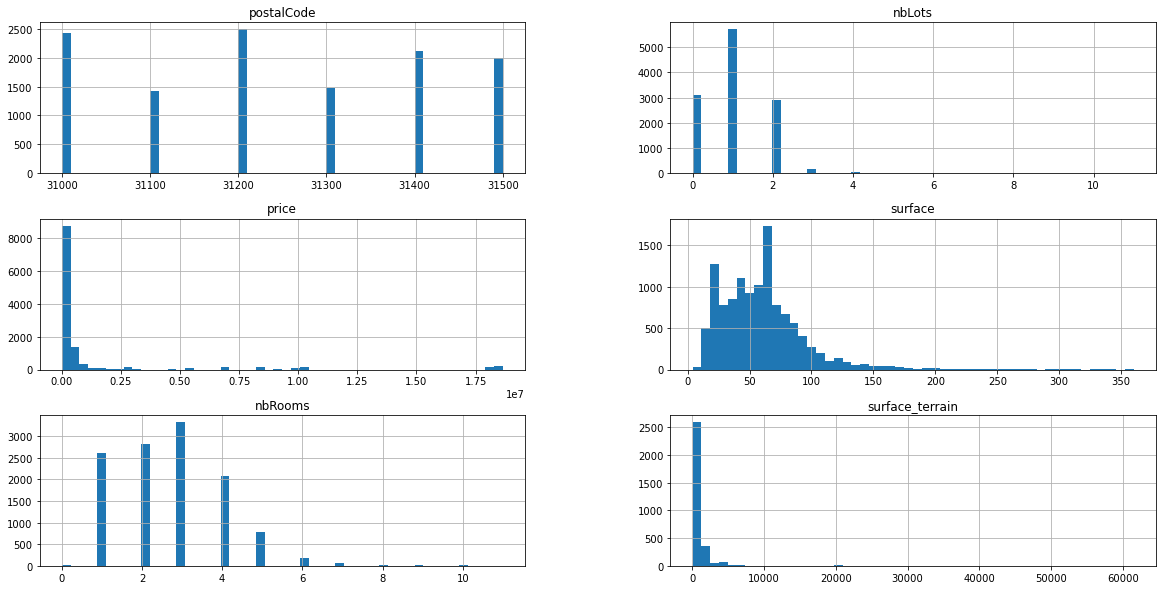

In [ ]:
df_cols.hist(bins=50)

Code postal
* je vois 6 codes postaux, entre 1400 et 2500 valeurs chacun. Cela semble relativement équilibré
* Ces valeurs, bien que numériques, représentent des données catégorielles. Il faudra les encoder en tant que tel. Vu qu'il n'y a pas d'ordre et un nombre faible, le one-hot encoder est à privilégier.

Nb lots
* Une grosse majorité est égal à 1 (~5,500), puis 0 et 2 (chacun 3,000). Quelques éléments à 3 et 4.
* Il vaut voir si les valeurs >=3 nécessitent un traitement particulier.

Prix
* Certains biens au prix élevé ( >10,000,000) faussent la visualisation. La grosse majorie (~8500) se situent sous 1,000,000
* Un traitement des outliers est à envisager

Surface
* Une distribution quasi-gaussienne (entre 0 et 100), avec une queue à droite.
* Un pic autour des 60m2 et un second vers les 30m2.
* Quelques valeurs extrêmes jusqu'à 350.

Nombre de pièces
* Principalement entre 1 et 3 pièces.
* Quelques valeurs extrêmes à 10 pièces.
* Il faudra comprendre les biens à 0 pièce.

Surface terrain
* Une majorité de bien proche de 0
* Mais des valeurs extrêmes rendent la lecture difficile.

array([[<AxesSubplot:xlabel='postalCode', ylabel='postalCode'>,
        <AxesSubplot:xlabel='nbLots', ylabel='postalCode'>,
        <AxesSubplot:xlabel='price', ylabel='postalCode'>,
        <AxesSubplot:xlabel='surface', ylabel='postalCode'>,
        <AxesSubplot:xlabel='nbRooms', ylabel='postalCode'>,
        <AxesSubplot:xlabel='surface_terrain', ylabel='postalCode'>],
       [<AxesSubplot:xlabel='postalCode', ylabel='nbLots'>,
        <AxesSubplot:xlabel='nbLots', ylabel='nbLots'>,
        <AxesSubplot:xlabel='price', ylabel='nbLots'>,
        <AxesSubplot:xlabel='surface', ylabel='nbLots'>,
        <AxesSubplot:xlabel='nbRooms', ylabel='nbLots'>,
        <AxesSubplot:xlabel='surface_terrain', ylabel='nbLots'>],
       [<AxesSubplot:xlabel='postalCode', ylabel='price'>,
        <AxesSubplot:xlabel='nbLots', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='surface', ylabel='price'>,
        <AxesSubplot:xlabel='nbRooms', ylabel='pri

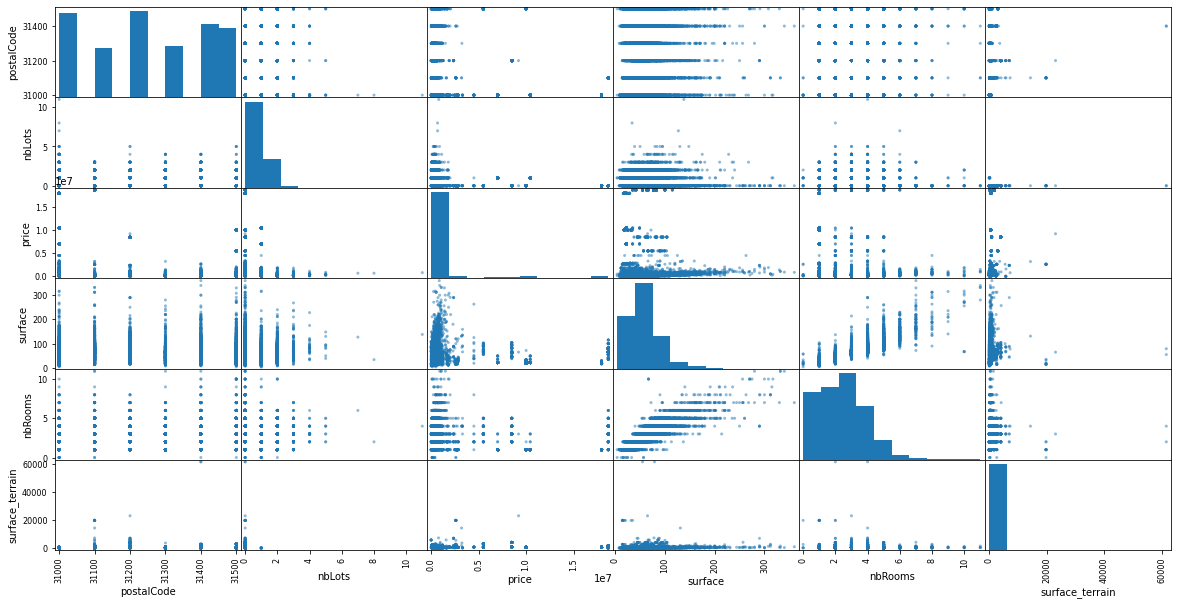

In [20]:
pd.plotting.scatter_matrix(df_cols)

Code postal
* Les biens chers semblent être dans le  31000 et le 31500
* Les terrains les plus grands sont dans le 31100 et le 31200

Nombre de lots
* Les biens à 0 lot et 1 lot semblent les plus chers
* Les biens à 0 lot semblent avoir la plus grande surface et surface terrain

Prix
* Par rapport à la surface, je peux voir une droite pour des valeurs <0.25 1e7, puis ensuite le prix semble être regroupé à certains intervalles, peu importe la surface.
* j'observe des biens très chers, ayant peu de surface terrain

Nombre de pièces
* Une corrélation positive avec la surface, cela semble logique.
* Les biens ayant le plus de pièces ne sont pas forcément les plus chers

<AxesSubplot:>

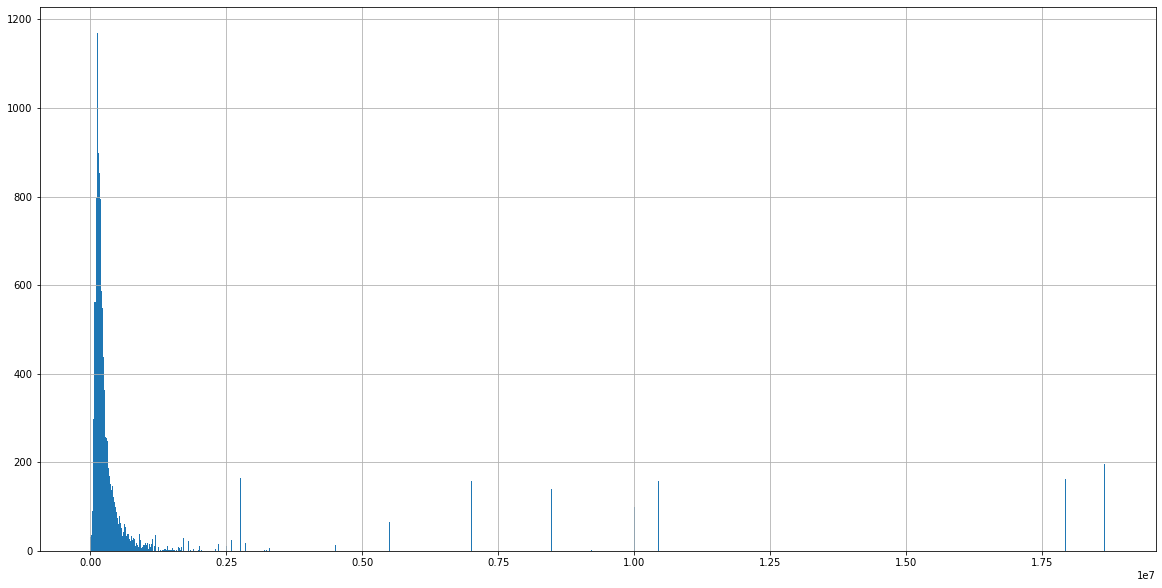

In [ ]:
df_cols["price"].hist(bins=1000)

<AxesSubplot:>

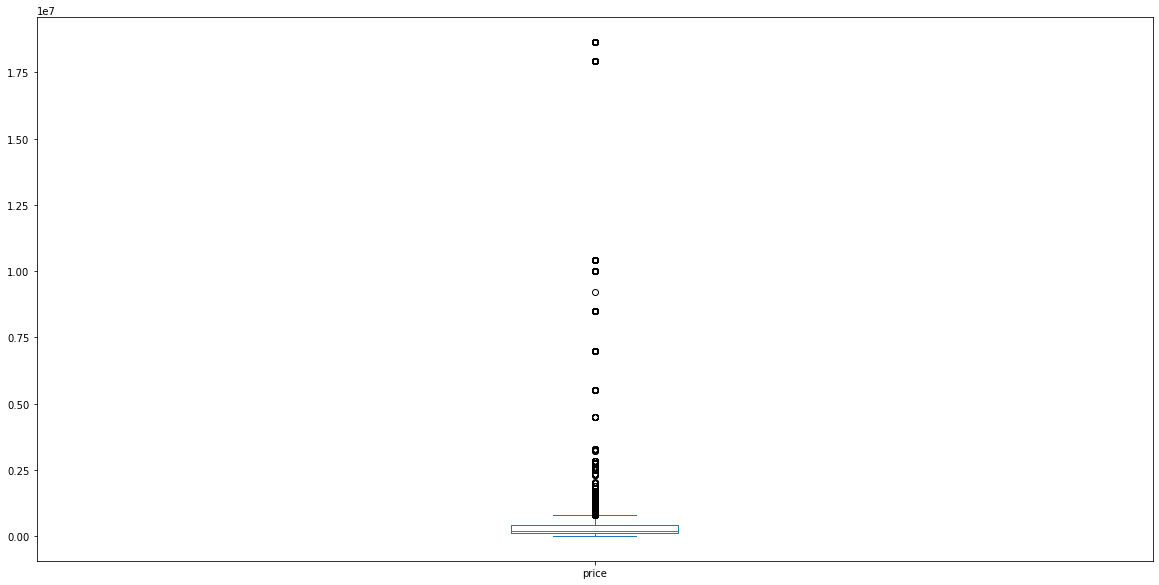

In [ ]:
df_cols["price"].plot.box()

In [23]:
df_cols["price"].describe()

count    1.191300e+04
mean     1.298110e+06
std      3.564897e+06
min      1.000000e+00
25%      1.303780e+05
50%      2.000000e+05
75%      4.000000e+05
max      1.865382e+07
Name: price, dtype: float64

* 75% des biens ont un prix <400,000.
* Visuellement, avec l'histogramme et la boite à moustache nous voyons clairement qu'au dela de 1,000,000, les valeurs deviennent beaucoup plus rares.
* je vais donc supprimer ces biens chers qui nécessiteraient un traitement particulier.

In [24]:
mask_price = df_cols["price"] < 500_000
df_cols = df_cols[mask_price]
df_cols

,postalCode,nbLots,local,price,lot1,lot1_carrez,surface,nbRooms,surface_terrain
1235326,31000.0,1,Appartement,85000.0,36.0,"22,95",23.0,1.0,NaN
1235334,31400.0,2,Appartement,182800.0,124.0,NaN,79.0,4.0,NaN
1235335,31500.0,1,Appartement,186000.0,32.0,"43,23",43.0,2.0,NaN
1235337,31400.0,1,Appartement,155370.0,39.0,"42,83",43.0,2.0,NaN
1235340,31500.0,1,Appartement,135732.0,350.0,"35,69",35.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1304645,31000.0,1,Appartement,180000.0,7.0,"46,81",43.0,2.0,NaN
1304684,31400.0,1,Appartement,83000.0,1110.0,NaN,22.0,1.0,NaN
1304685,31400.0,2,Appartement,139400.0,61.0,NaN,57.0,3.0,NaN
1304696,31200.0,1,Appartement,290000.0,2.0,"64,70",56.0,3.0,NaN


<AxesSubplot:>

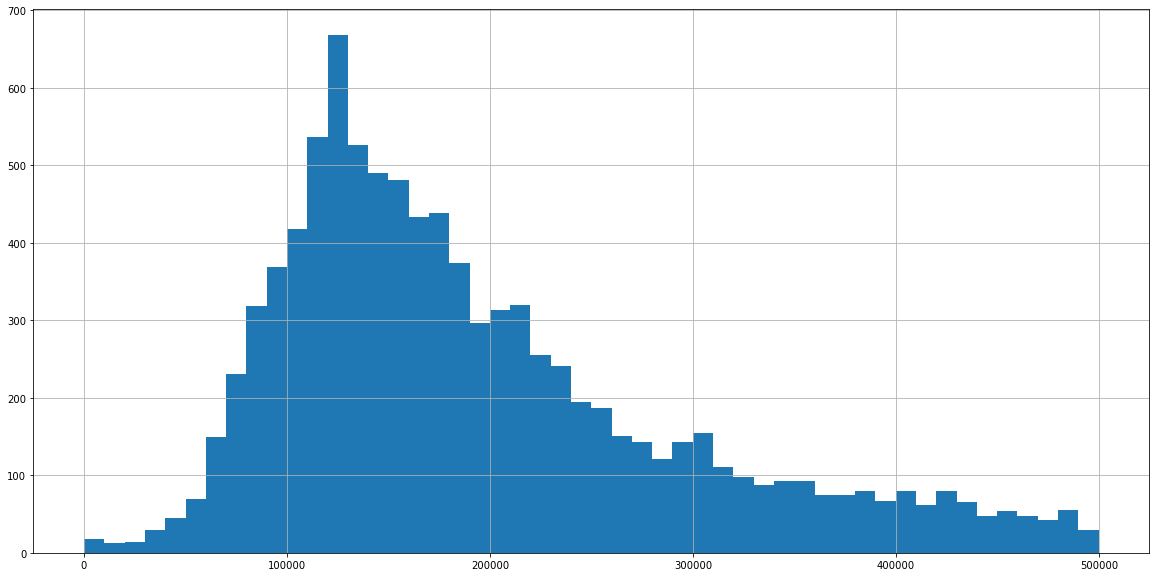

In [25]:
df_cols["price"].hist(bins=50)

<AxesSubplot:>

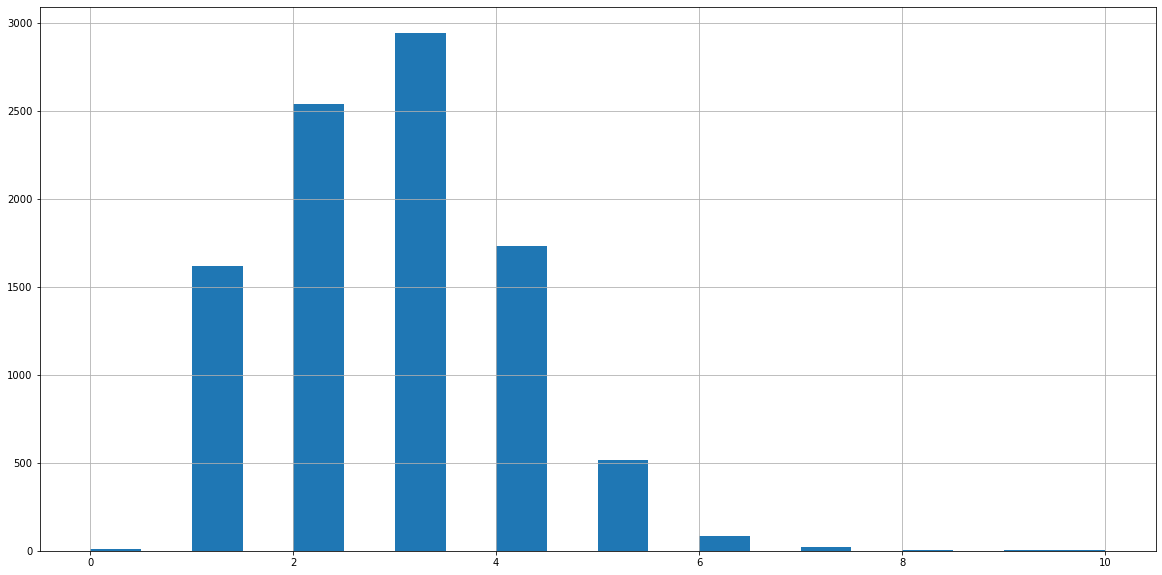

In [ ]:
df_cols["nbRooms"].hist(bins=20)

In [ ]:
mask_nbRooms_0 = df_cols["nbRooms"] == 0
df_cols[mask_nbRooms_0]

,postalCode,nbLots,local,price,lot1,lot1_carrez,surface,nbRooms,surface_terrain
1238457,31400.0,2,Appartement,110303.0,10.0,NaN,25.0,0.0,NaN
1249648,31500.0,0,Appartement,415000.0,NaN,NaN,20.0,0.0,381.0
1251398,31000.0,1,Appartement,180000.0,40.0,NaN,33.0,0.0,NaN
1253974,31000.0,0,Appartement,200000.0,NaN,NaN,57.0,0.0,185.0
1255577,31000.0,1,Appartement,135650.0,12.0,NaN,4.0,0.0,NaN
1255726,31000.0,1,Appartement,76000.0,5.0,NaN,12.0,0.0,NaN
1257472,31000.0,1,Appartement,350000.0,140.0,NaN,16.0,0.0,NaN
1260054,31000.0,1,Appartement,102500.0,9.0,NaN,22.0,0.0,NaN
1263346,31000.0,1,Appartement,136000.0,12.0,NaN,25.0,0.0,NaN
1304114,31000.0,0,Appartement,370000.0,NaN,NaN,57.0,0.0,185.0


In [ ]:
mask_terrain_0 = (df_cols["surface_terrain"] == 0) | (df_cols["surface_terrain"].isna())
df_cols[mask_terrain_0]

,postalCode,nbLots,local,price,lot1,lot1_carrez,surface,nbRooms,surface_terrain
1235326,31000.0,1,Appartement,85000.0,36.0,"22,95",23.0,1.0,NaN
1235334,31400.0,2,Appartement,182800.0,124.0,NaN,79.0,4.0,NaN
1235335,31500.0,1,Appartement,186000.0,32.0,"43,23",43.0,2.0,NaN
1235337,31400.0,1,Appartement,155370.0,39.0,"42,83",43.0,2.0,NaN
1235340,31500.0,1,Appartement,135732.0,350.0,"35,69",35.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1304645,31000.0,1,Appartement,180000.0,7.0,"46,81",43.0,2.0,NaN
1304684,31400.0,1,Appartement,83000.0,1110.0,NaN,22.0,1.0,NaN
1304685,31400.0,2,Appartement,139400.0,61.0,NaN,57.0,3.0,NaN
1304696,31200.0,1,Appartement,290000.0,2.0,"64,70",56.0,3.0,NaN


In [ ]:
df_cols[mask_terrain_0]["local"].value_counts()

Appartement    8002
Maison          173
Name: local, dtype: int64

In [ ]:
# Lot1 et surface carrez
# je vais remplacer les valeurs nulles par 0. Comme elles représentent des surfaces, les remplacer par 0 représente la même information.

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Il faut d'abord convertir lot1 et lot1_carrez

df_cols["lot1"] = df_cols["lot1"].astype(float)
df_cols["lot1"] = df_cols["lot1"].fillna(0)

df_cols["lot1_carrez"] = df_cols["lot1_carrez"].str.replace(",", ".").astype(float) 
df_cols["lot1_carrez"] = df_cols["lot1_carrez"].fillna(0)

df_cols["surface_terrain"] = df_cols["surface_terrain"].fillna(0)

In [32]:

df_cols["lot1_carrez"] = df_cols["lot1_carrez"].fillna(0)

df_cols["surface_terrain"] = df_cols["surface_terrain"].fillna(0)

# Préparation des données

In [120]:
from sklearn.model_selection import train_test_split

X = df_cols.drop("price", axis=1)
y = df_cols["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7584, 8)
(7584,)
(1896, 8)
(1896,)


In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9480 entries, 1235326 to 1304697
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   postalCode       9480 non-null   float64
 1   nbLots           9480 non-null   int64  
 2   local            9480 non-null   object 
 3   lot1             9480 non-null   float64
 4   lot1_carrez      9480 non-null   float64
 5   surface          9480 non-null   float64
 6   nbRooms          9480 non-null   float64
 7   surface_terrain  9480 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 924.6+ KB


## Données catégorielles

je teste d'abord. Puis je met cela dans un pipeline.

In [122]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["postalCode", "local"]

ohe = OneHotEncoder(sparse_output=False)
X_train_cat = ohe.fit_transform(X_train[categorical_cols])
print(ohe.get_feature_names_out().tolist())

['postalCode_31000.0', 'postalCode_31100.0', 'postalCode_31200.0', 'postalCode_31300.0', 'postalCode_31400.0', 'postalCode_31500.0', 'local_Appartement', 'local_Maison']


## Données numériques



In [123]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ["nbLots", "lot1", "lot1_carrez", "surface", "nbRooms", "surface_terrain"]
scaler = MinMaxScaler()
X_train_num = scaler.fit_transform(X_train[numerical_cols])

X_train_num

array([[0.4       , 0.0086224 , 0.        , 0.20127796, 0.4       ,
        0.        ],
       [0.4       , 0.00451018, 0.        , 0.07667732, 0.2       ,
        0.        ],
       [0.2       , 0.02089275, 0.        , 0.15335463, 0.2       ,
        0.        ],
       ...,
       [0.4       , 0.00802547, 0.        , 0.12779553, 0.2       ,
        0.        ],
       [0.4       , 0.07740267, 0.        , 0.15654952, 0.3       ,
        0.        ],
       [0.        , 0.        , 0.        , 0.2715655 , 0.3       ,
        0.03118503]])

In [124]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(), categorical_cols),
        ("scaler", MinMaxScaler(), numerical_cols),
    ]
)


# Modèle de référence

je choisis un modèle de référence basique qui va toujours prédire la moyenne.

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor

model = DummyRegressor(strategy="mean")

steps = [ ("preparation", ct), ("model",model) ]
pipeline = Pipeline(steps)
pipeline

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['postalCode', 'local']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['nbLots', 'lot1',
                                                   'lot1_carrez', 'surface',
                                                   'nbRooms',
                                                   'surface_terrain'])])),
                ('model', DummyRegressor())])

In [ ]:

from sklearn.model_selection import cross_validate, cross_val_score

scores = cross_val_score(pipeline, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
scores

score = np.abs(np.mean(scores))
score_std = np.std(scores)

print(score, score_std)


100274.840934319 1131.1386837168454


In [129]:
def evaluate(name, model, categorical_cols, numerical_cols):
    
    ct = ColumnTransformer(
        [
            ("ohe", OneHotEncoder(), categorical_cols),
            ("scaler", MinMaxScaler(), numerical_cols),
        ]
    )
    steps = [ ("preparation", ct), (name, model) ]
    pipeline = Pipeline(steps)
    pipeline
    
    scores = cross_val_score(pipeline, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
    return np.abs(scores)


# Comparaison de premiers modèles

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = []

models.append( ("LR", LinearRegression()) )
models.append( ("KNN", KNeighborsRegressor()) )
models.append( ("DT", DecisionTreeRegressor()) )
models.append( ("RF", RandomForestRegressor()) )

In [133]:
scores = []
names = []
    
categorical_cols = ["postalCode", "local"]
numerical_cols = ["nbLots", "lot1", "lot1_carrez", "surface", "nbRooms", "surface_terrain"]

for (name, model) in models:
    model_scores = evaluate(name, model, categorical_cols, numerical_cols)
    scores.append(model_scores)
    names.append(name)

In [134]:
def print_score(name, scores):
    print(f"{name} : {np.mean(scores):.0f} (+/- {np.std(scores):.0f})")

LR : 72088 (+/- 451)
KNN : 67454 (+/- 418)
DT : 84742 (+/- 2805)
RF : 62898 (+/- 569)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e51096640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9ebdc7c520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e510965b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9ebdc7cac0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9ebdc840a0>,
 'means': [<matplotlib.lines.Line2D at 0x7f9ebdc7cd90>,
  <matplotlib.lines.Line2D at 0x7f9ebdc9cfa0>]}

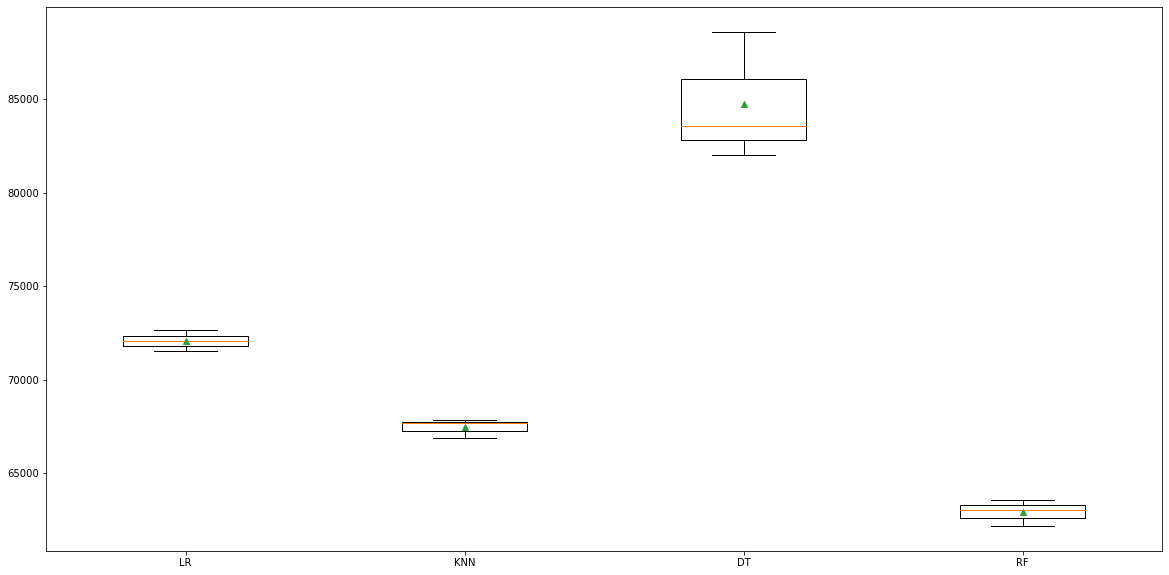

In [135]:
for index, name in enumerate(names):
    model_scores = scores[index]
    print_score(name, model_scores)
plt.boxplot(scores, labels=names, showmeans=True)

La RF montre clairement les meilleurs performances. je vais conserver ce modèle : RF : 62902 (+/- 430).

C'est quand même une nette amélioration par rapport au modèle de référence.

In [136]:
df_cols["surface_per_room"] = df_cols["surface"] / df_cols["nbRooms"]
df_cols

,postalCode,nbLots,local,price,lot1,lot1_carrez,surface,nbRooms,surface_terrain,surface_per_room
1235326,31000.0,1,Appartement,85000.0,36.0,22.95,23.0,1.0,0.0,23.000000
1235334,31400.0,2,Appartement,182800.0,124.0,0.00,79.0,4.0,0.0,19.750000
1235335,31500.0,1,Appartement,186000.0,32.0,43.23,43.0,2.0,0.0,21.500000
1235337,31400.0,1,Appartement,155370.0,39.0,42.83,43.0,2.0,0.0,21.500000
1235340,31500.0,1,Appartement,135732.0,350.0,35.69,35.0,1.0,0.0,35.000000
...,...,...,...,...,...,...,...,...,...,...
1304645,31000.0,1,Appartement,180000.0,7.0,46.81,43.0,2.0,0.0,21.500000
1304684,31400.0,1,Appartement,83000.0,1110.0,0.00,22.0,1.0,0.0,22.000000
1304685,31400.0,2,Appartement,139400.0,61.0,0.00,57.0,3.0,0.0,19.000000
1304696,31200.0,1,Appartement,290000.0,2.0,64.70,56.0,3.0,0.0,18.666667


In [137]:
mask_inf = df_cols["surface_per_room"] == np.inf
df_cols.loc[mask_inf, "surface_per_room"] = df_cols["surface"]
df_cols.describe()

,postalCode,nbLots,price,lot1,lot1_carrez,surface,nbRooms,surface_terrain,surface_per_room
count,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000
mean,31262.246835,1.202004,193890.022447,241.472152,16.044447,58.064979,2.721941,84.695148,21.944717
std,165.508275,0.700862,100017.021440,1090.587509,28.420826,26.574083,1.203567,368.841718,5.726525
min,31000.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000
25%,31100.000000,1.000000,122000.000000,6.000000,0.000000,39.000000,2.000000,0.000000,18.666667
50%,31300.000000,1.000000,168000.000000,27.000000,0.000000,57.000000,3.000000,0.000000,21.000000
75%,31400.000000,2.000000,243000.000000,111.000000,29.132500,72.000000,3.000000,0.000000,24.000000
max,31500.000000,5.000000,499800.000000,15077.000000,776.690000,317.000000,10.000000,5772.000000,104.000000


In [138]:
X = df_cols.drop("price", axis=1)
y = df_cols["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [139]:
    
categorical_cols = ["postalCode", "local"]
numerical_cols = ["nbLots", "lot1", "lot1_carrez", "surface", "nbRooms", "surface_terrain", "surface_per_room"]

ct = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(), categorical_cols),
        ("scaler", MinMaxScaler(), numerical_cols),
    ]
)

steps = [ ("preparation", ct), ("rf", RandomForestRegressor()) ]
pipeline = Pipeline(steps)
pipeline

scores = cross_val_score(pipeline, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)

print_score("RF", scores)
# Le résultat n'est pas mieux. Ce n'est pas la peine de conserver cette feature.


RF : -63441 (+/- 510)


In [140]:
df_cols = df_cols.drop(["surface_per_room"], axis=1)

In [141]:
X = df_cols.drop(["price"], axis=1)
y = df_cols["price"]

    
categorical_cols = ["postalCode", "local"]
numerical_cols = ["nbLots", "lot1", "lot1_carrez", "surface", "nbRooms", "surface_terrain"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
scores = evaluate("RF", RandomForestRegressor(), categorical_cols, numerical_cols)
print_score("RF", scores)


RF : 62999 (+/- 544)


# Hypertuning

In [142]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "rf__max_depth": [5, 10, 50, 100, 200],
    "rf__n_estimators":[20,50,80,100,200,500]
}

categorical_cols = ["postalCode", "local"]
numerical_cols = ["nbLots", "lot1", "lot1_carrez", "surface", "nbRooms", "surface_terrain"]

ct = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(), categorical_cols),
        ("scaler", MinMaxScaler(), numerical_cols),
    ]
)
steps = [ ("preparation", ct), ("rf", RandomForestRegressor()) ]
pipeline = Pipeline(steps)
pipeline

cv = GridSearchCV(pipeline, param_grid=param_grid, scoring="neg_root_mean_squared_error", cv=3)
cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         ['postalCode',
                                                                          'local']),
                                                                        ('scaler',
                                                                         MinMaxScaler(),
                                                                         ['nbLots',
                                                                          'lot1',
                                                                          'lot1_carrez',
                                                                          'surface',
                                                                          'nbRooms',
                                                                          'surface_terrain'])])),
                                       ('rf', RandomForestRegressor())]),
             param_grid={'rf__max_depth': [5, 10, 50, 100, 200],
                         'rf__n_estimators': [20, 50, 80, 100, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [143]:
print("Best score: ", cv.best_score_)
print("Best params:", cv.best_params_)

Best score:  -61423.5227178256
Best params: {'rf__max_depth': 10, 'rf__n_estimators': 500}


# Déploiement

In [80]:
import pickle

model = cv.best_estimator_
pickle.dump(model, open("model.pkl", "wb"))


# Conclusion

RMSE est de 61,375.
Cela n'est pas encore acceptable au vue des seuils définis par le client.
Les features sélectionnés sont très simples.

Pour améliorer le modèle : 
- faire de la sélection de features à partir de ce jeu de données
- mieux traiter les valeurs extrêmes des features actuelles
- récupérer des informations de sources externes, comme la distance du métro et des écoles